# Data Exploration and Data Loading
The Fake news and Real news CSV files was load to python for exploration and than follow by pre-processing and later analysis.

In [1]:
# Supress warnings
import warnings

warnings.filterwarnings("ignore")#..... Import the pandas Library to create a pandas Data frame........##
import pandas as pd 

#.......... Load the Fake and True Data set into python using the read_csv function...###
fakenews_data=pd.read_csv("Fake.csv")
reaknews_data=pd.read_csv("True.csv")

display(fakenews_data)
display(reaknews_data)

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [2]:
#................Information About the Data Set .........#
display(fakenews_data.info())
display(reaknews_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [3]:


# dropping rows that have urls as text and date, real's dates look fine, also dropping ones that have no text
fakenews_drop = fakenews_data.drop(index=[9358,15507,15508,18933])
fakenews_drop = fakenews_data.drop(fakenews_drop.loc[fakenews_drop.text == ' '].index)
realnews_drop = reaknews_data.drop(reaknews_data.loc[reaknews_data.text == ' '].index)




In [4]:
# Give labels to data before combining
fakenews_drop['Label'] = 1
reaknews_data['Label'] = 0


In [5]:
combined_data = pd.concat([fakenews_drop, reaknews_data])

In [6]:
# How many words present in each sample 

length = []
[length.append(len(str(text))) for text in combined_data["title"] + combined_data["text"]]
combined_data["length"] = length
combined_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  Label  length  
0  December 31, 2017      1    2972  
1  December 31, 2017      1    1967  
2  December 30, 2017      1    3687  
3  December 29, 2017      1    2852  
4  December 25, 2017      1    2416

In [7]:
# Get minimum, maximum, average length

print("Minimum sentence length = ", min(combined_data["length"]))
print("Maximum sentence length = ", max(combined_data["length"]))
avg_sent_len = round(sum(combined_data["length"])/len(combined_data["length"]))


print("Average sentence length = ", avg_sent_len)

Minimum sentence length =  31
Maximum sentence length =  51892
Average sentence length =  2584


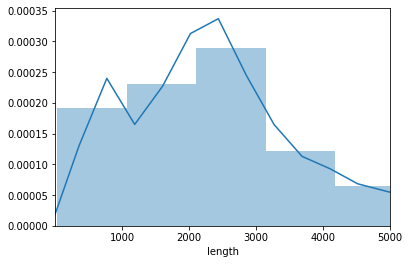

In [9]:
#Plotting the sentence length in the document 
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.distplot(combined_data["length"], ax=ax)
ax.set_xlim(1, 5000)
plt.show()

In [10]:
display(combined_data)

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       News   
3      On Christmas day, Donald Trump announced that ...       News   
4      Pope Francis used his annual Christmas Day mes...       News   
...                                                  ...        ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                    date  Label  length  
0      December 31, 2017      1    2972  
1      December 31, 2017      1    1967  
2      December 30, 2017      1    3687  
3      December 29, 2017      1    2852  
4      December 25, 2017      1    2416  
...                  ...    ...     ...  
21412   August 22, 2017       0    2882  
21413   August 22, 2017       0     852  
21414   August 22, 2017       0    1999  
21415   August 22, 2017       0    1260  
21416   August 22, 2017       0    1390  

[44272 rows x 6 columns]

In [11]:
combined_data["text"] = combined_data["title"] + combined_data["text"]
combined_data.drop(columns=["title", "subject", "date", "length"], axis=1, inplace=True)

display(combined_data)

text  Label
0       Donald Trump Sends Out Embarrassing New Year’...      1
1       Drunk Bragging Trump Staffer Started Russian ...      1
2       Sheriff David Clarke Becomes An Internet Joke...      1
3       Trump Is So Obsessed He Even Has Obama’s Name...      1
4       Pope Francis Just Called Out Donald Trump Dur...      1
...                                                  ...    ...
21412  'Fully committed' NATO backs new U.S. approach...      0
21413  LexisNexis withdrew two products from Chinese ...      0
21414  Minsk cultural hub becomes haven from authorit...      0
21415  Vatican upbeat on possibility of Pope Francis ...      0
21416  Indonesia to buy $1.14 billion worth of Russia...      0

[44272 rows x 2 columns]

In [12]:
X=combined_data.drop('Label',axis=1)


In [14]:
# Getting the Dependent Features
y=combined_data["Label"]

In [15]:
# checking the distribution among the classes that is the number of fake news and the number of Real news
#22855 fake news articles and 21417 real news articles 
y.value_counts()

1    22855
0    21417
Name: Label, dtype: int64

In [16]:
#Independent features shape 
X.shape

(44272, 1)

In [17]:
#Dependent  features shape 
y.shape

(44272,)

In [18]:
## Vocabulary size 
vocab_size = 4500

In [19]:
# Onehot Representation 

dep_variablemessages = X.copy()


In [20]:
dep_variablemessages["text"][2]

2     Sheriff David Clarke Becomes An Internet Joke...
2    Senior U.S. Republican senator: 'Let Mr. Muell...
Name: text, dtype: object

In [21]:
dep_variablemessages.reset_index(inplace=True)

In [22]:
import nltk
import re
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Pre-processing 

In [24]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(dep_variablemessages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', dep_variablemessages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [25]:
# The corpus for all of the text variable content
corpus

['donald trump send embarrass new year eve messag disturbingdonald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb 

In [26]:
# Building vocabulary

vocab = set(corpus)
print("%d unique words" % (len(vocab)))

38387 unique words


In [27]:
# Calculate tf-idf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

count_vect = CountVectorizer(stop_words="english")
sf = count_vect.fit_transform(corpus)

tfidf_trans = TfidfTransformer()
transformed_weights = tfidf_trans.fit_transform(sf)

weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
df_weights = pd.DataFrame({"term": count_vect.get_feature_names(), "weight": weights})
df_weights.sort_values(by="weight", ascending=False).head(10)

term    weight
95336       trump  0.057934
80726        said  0.037442
72468      presid  0.023127
88082       state  0.022622
77572  republican  0.020330
16787     clinton  0.018721
65217       obama  0.017823
40607        hous  0.016435
69461       peopl  0.016207
26719       elect  0.015796

In [28]:
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,vocab_size)for words in corpus] 
onehot_repr

[[156,
  3397,
  2374,
  4402,
  3148,
  4083,
  663,
  571,
  390,
  3397,
  2217,
  1684,
  2294,
  3148,
  4083,
  641,
  4239,
  2125,
  1187,
  1620,
  2101,
  2831,
  3461,
  2700,
  2141,
  2915,
  784,
  1244,
  3168,
  3570,
  3964,
  132,
  3492,
  1619,
  110,
  1385,
  2880,
  2217,
  1841,
  2598,
  1620,
  2101,
  411,
  2831,
  3461,
  2700,
  2141,
  2294,
  2936,
  3148,
  4083,
  923,
  472,
  357,
  3671,
  4010,
  4083,
  595,
  132,
  3492,
  1619,
  110,
  1385,
  2880,
  2217,
  1841,
  2598,
  1620,
  2101,
  411,
  2831,
  3461,
  2700,
  2141,
  2294,
  2936,
  3148,
  4083,
  4010,
  4083,
  595,
  156,
  2174,
  3397,
  4413,
  3528,
  3397,
  3671,
  1594,
  432,
  3491,
  3479,
  923,
  2374,
  3148,
  4083,
  1950,
  2334,
  1781,
  870,
  988,
  1227,
  3397,
  1348,
  3849,
  411,
  2459,
  615,
  3892,
  1079,
  2706,
  2217,
  1684,
  782,
  2294,
  3148,
  4083,
  78,
  3545,
  1608,
  4498,
  3528,
  3570,
  2334,
  347,
  1912,
  3528,
  1360,
  13

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length=100
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[ 663 3671 2294 ...  271 3377 1554]
 [3275  692 2915 ... 1025 3377 1554]
 [3033 1526 1281 ... 3867 3377 1554]
 ...
 [1467 2854 1536 ... 4388 1999    6]
 [3676 1727 3979 ... 2628 3987 4038]
 [3307 3388 1163 ... 3891 1467  108]]


In [84]:
embedded_docs[0]

array([ 663, 3671, 2294, 3148, 4083, 2690, 1347, 1620, 2023,   76,  697,
        488, 3635,  156, 2174, 3397, 4413, 3528, 4100, 3148, 3397, 4083,
       3397, 2747,  571, 1620, 2101, 3148, 4083, 3569, 1370,  502, 1281,
       2663,  553, 2143, 1705, 3688, 2436,  888, 3528, 3397,  834, 3671,
       2904,  812, 1079, 3979, 2174, 1001,  923, 2897, 3841, 2163, 3528,
       2163, 2334, 2044, 3188, 4083,  742, 1771, 2368,  726, 2235, 3528,
       1171,  543, 2411, 2083, 2101, 1385, 3360, 3528, 2022, 4083, 1656,
        488, 1430, 3528, 4471, 3876,  567, 1857, 1302, 2937, 3887, 1970,
       3280, 4083, 1656, 2631, 2937, 4083, 1677, 3052,  118,  271, 3377,
       1554])

# Model Creating for Data Analysis

In [36]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [86]:
## Creating model
embedding_vector_features=300
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 300)          1350000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,510,501
Trainable params: 1,510,501
Non-trainable params: 0
_________________________________________________________________
None


In [87]:
## Creating model
embedding_vector_features=300
model1=Sequential()
model1.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 300)          1350000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 1,671,001
Trainable params: 1,671,001
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
# checking the length of the embedded document to the shape of the y variable 
len(embedded_docs),y.shape

(44272, (44272,))

In [94]:
# Converting the x and y variable to a numpy array 
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [96]:
# checking the shape for both x and y variables 
X_final.shape,y_final.shape

((44272, 100), (44272,))

In [99]:
#Split Data into Traning and Test Set for the Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [101]:
### Finally Training
history=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size =32)

Epoch 1/5
927/927 [==============================] - 267s 288ms/step - loss: 0.1245 - accuracy: 0.9541 - val_loss: 0.1073 - val_accuracy: 0.9683
Epoch 2/5
927/927 [==============================] - 267s 288ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0611 - val_accuracy: 0.9795
Epoch 3/5
927/927 [==============================] - 247s 267ms/step - loss: 0.0272 - accuracy: 0.9916 - val_loss: 0.0734 - val_accuracy: 0.9801
Epoch 4/5
927/927 [==============================] - 269s 290ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0804 - val_accuracy: 0.9799
Epoch 5/5
927/927 [==============================] - 246s 266ms/step - loss: 0.0111 - accuracy: 0.9960 - val_loss: 0.1010 - val_accuracy: 0.9780


In [103]:
# Creating the Y_pred variable for Model1
y_pred1=model1.predict_classes(X_test)

In [107]:
# Import confusion Matrix from Sklearn metrics 
from sklearn.metrics import confusion_matrix

In [110]:
# Implementing the confusion metrics on the model ability to prdict the x_test and y_pred
confusion_matrix(y_test,y_pred1)

array([[6895,  179],
       [ 142, 7394]], dtype=int64)

In [112]:
# From the Sklearn metrics import the accuracy score to check the model performance 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9780287474332648

In [115]:
# From sklearn library import the classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7074
           1       0.98      0.98      0.98      7536

    accuracy                           0.98     14610
   macro avg       0.98      0.98      0.98     14610
weighted avg       0.98      0.98      0.98     14610



([<matplotlib.axis.XTick at 0x2493491d9c8>,
 <a list of 5 Text xticklabel objects>)

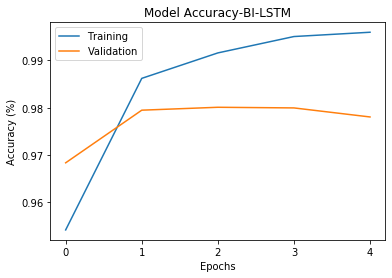

In [157]:
#Plotting the model Accuracy againt the validation Data 
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy-BI-LSTM')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

([<matplotlib.axis.XTick at 0x24933d59748>,
 <a list of 5 Text xticklabel objects>)

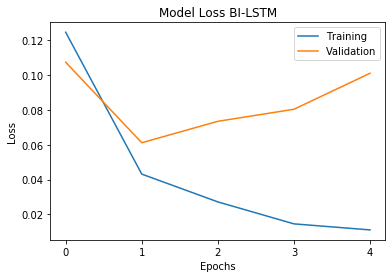

In [158]:
# Plotting the Loss Result from the Loss function during the model compilation 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss BI-LSTM')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

In [119]:
# tensorflow.keras.etc is for the Model Architecture 
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,RNN,GRU, SpatialDropout1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [123]:
# Constructing the GRU model Architecture 
modelg = Sequential()
modelg.add(Embedding(vocab_size,embedding_vector_features,input_length=sent_length))
modelg.add(GRU(100))
modelg.add(Dense(256))
modelg.add(Activation('relu'))
modelg.add(Dropout(0.5))
modelg.add(Dense(1, name='out_layer'))
modelg.add(Activation('sigmoid'))
modelg.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelg.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 300)          1350000   
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               120600    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               25856     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_11 (Activation)   (None, 1)               

In [124]:
### Finally Training the GRU Model 
historyg=modelg.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
927/927 [==============================] - 158s 171ms/step - loss: 0.1256 - accuracy: 0.9551 - val_loss: 0.0938 - val_accuracy: 0.9679
Epoch 2/5
927/927 [==============================] - 165s 178ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0666 - val_accuracy: 0.9775
Epoch 3/5
927/927 [==============================] - 160s 172ms/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.0674 - val_accuracy: 0.9770
Epoch 4/5
927/927 [==============================] - 159s 172ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0741 - val_accuracy: 0.9814
Epoch 5/5
927/927 [==============================] - 159s 171ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.1047 - val_accuracy: 0.9791


In [126]:

y_pred2=modelg.predict_classes(X_test)

In [133]:
from sklearn.metrics import confusion_matrix

In [137]:
confusion_matrix(y_test,y_pred2)

array([[6886,  188],
       [ 118, 7418]], dtype=int64)

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9790554414784394

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7074
           1       0.98      0.98      0.98      7536

    accuracy                           0.98     14610
   macro avg       0.98      0.98      0.98     14610
weighted avg       0.98      0.98      0.98     14610



([<matplotlib.axis.XTick at 0x24933543b08>,
 <a list of 5 Text xticklabel objects>)

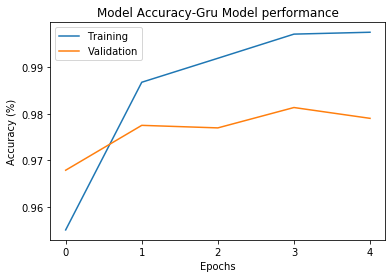

In [146]:
import matplotlib.pyplot as plt

plt.plot(historyg.history['accuracy'])
plt.plot(historyg.history['val_accuracy'])
plt.title('Model Accuracy-Gru Model performance')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

([<matplotlib.axis.XTick at 0x24934979188>,
 <a list of 5 Text xticklabel objects>)

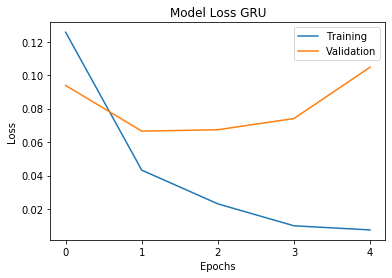

In [156]:
plt.plot(historyg.history['loss'])
plt.plot(historyg.history['val_loss'])
plt.title('Model Loss GRU')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

# Next Experiment of Removing all other features unless the Text and the Label to check for Model performance 


In [153]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

457/457 [==============================] - 14s 31ms/step - loss: 0.0733 - accuracy: 0.9739
[0.07326509058475494, 0.9738535284996033]


In [154]:
#
score = model1.evaluate(X_test, y_test,verbose=1)

print(score)

457/457 [==============================] - 23s 50ms/step - loss: 0.1010 - accuracy: 0.9780
[0.1010035052895546, 0.9780287742614746]


In [155]:
score = modelg.evaluate(X_test, y_test,verbose=1)

print(score)

457/457 [==============================] - 14s 30ms/step - loss: 0.1047 - accuracy: 0.9791
[0.10473447293043137, 0.9790554642677307]


In [151]:
y_pred1[:5]

array([[0],
       [0],
       [1],
       [0],
       [1]])

In [152]:
y_test[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [149]:
### Finally Training
history2=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=2,batch_size=32)

Epoch 1/2
927/927 [==============================] - 132s 142ms/step - loss: 0.1279 - accuracy: 0.9567 - val_loss: 0.0890 - val_accuracy: 0.9712
Epoch 2/2
927/927 [==============================] - 187s 202ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0733 - val_accuracy: 0.9739
